<a href="https://colab.research.google.com/github/Manalis133/SEVEN7CODE/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
# Step 2: Load and preprocess customer data
data = pd.read_csv('/content/Mall_Customers.csv')
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 3: Perform KMeans clustering
# Let's initially choose an arbitrary number of clusters (e.g., 5)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

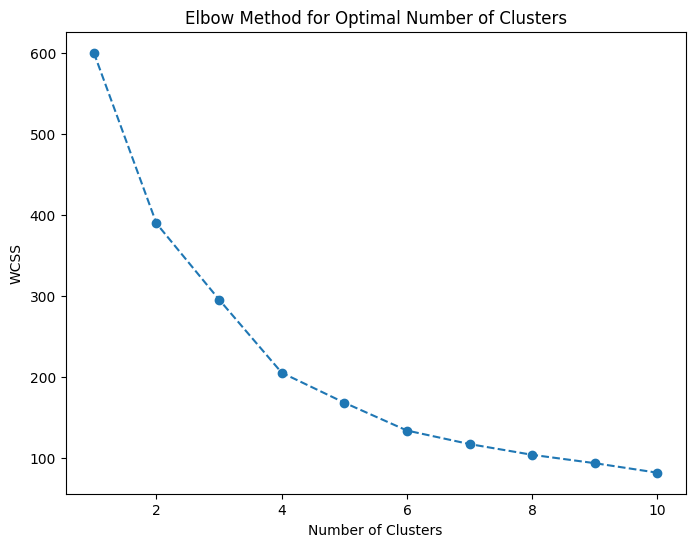

In [ ]:
# Step 4: Identify the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# From the Elbow Method graph, choose the number of clusters (e.g., 4)
optimal_num_clusters = 4

# Step 5: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

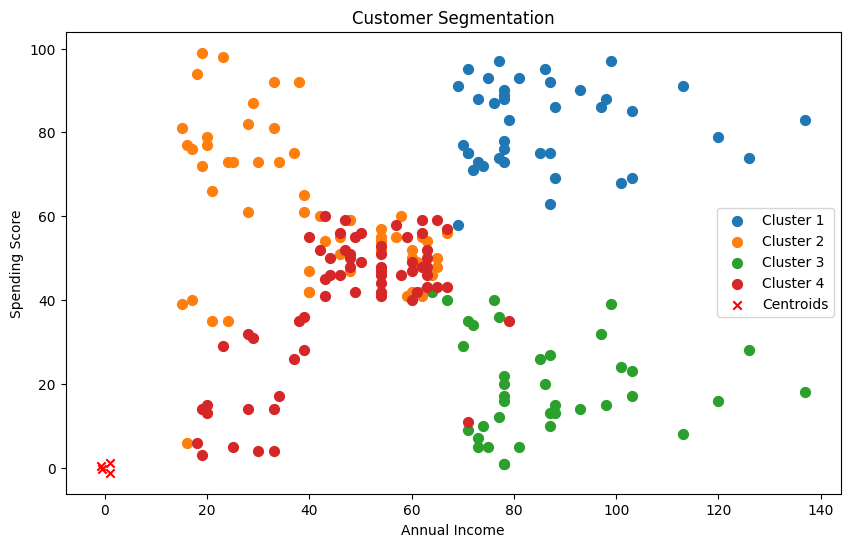

In [ ]:
# Step 6: Visualize the clusters
data['Cluster'] = kmeans.labels_

# Visualize clusters using scatter plots
plt.figure(figsize=(10, 6))
for cluster in range(optimal_num_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster + 1}', s=50)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# Step 7: Analyze and identify target customer segments based on the interpretation of clusters
# You can analyze the characteristics of each cluster and identify target customers accordingly.

# For example, you can create a DataFrame for each cluster:
for cluster in range(optimal_num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f'Cluster {cluster + 1} Statistics:')
    print(cluster_data.describe())

# You can now tailor marketing strategies based on the characteristics of each cluster.


Cluster 1 Statistics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               40.000000   
mean    161.02500  32.875000           86.100000               81.525000   
std      23.33863   3.857643           16.339036                9.999968   
min     123.00000  27.000000           69.000000               58.000000   
25%     141.50000  30.000000           74.750000               74.000000   
50%     161.00000  32.000000           78.500000               83.000000   
75%     180.50000  36.000000           94.000000               90.000000   
max     200.00000  40.000000          137.000000               97.000000   

       Cluster  
count     40.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 2 Statistics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   57.000000  57.000000           57.